In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [4]:
preprocessed_data = pd.read_csv('data_processed.csv')

In [5]:
preprocessed_data.shape
preprocessed_data.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,...,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,essay_words_bins,prev_proj_bins,quantity_bins,price_bins
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,0,154.6,...,7,272,16-12,educational support for english learners at home,students english learners working english seco...,students need opportunities practice beginning...,"(270, 280]","(-1, 4]","(20, 25]","(150, 160]"


# Splitting data into X & Y

In [6]:
y = preprocessed_data['project_is_approved'].values
x = preprocessed_data.drop(['project_is_approved'], axis=1)
x.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,essay_words_bins,prev_proj_bins,quantity_bins,price_bins
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,154.6,23,7,272,16-12,educational support for english learners at home,students english learners working english seco...,students need opportunities practice beginning...,"(270, 280]","(-1, 4]","(20, 25]","(150, 160]"


# Splitting data into Train & Test data

In [7]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, stratify=y)
print(y_tr.size)
print(y_te.size)
print(x_tr.shape)
print(x_te.shape)

87398
21850
(87398, 20)
(21850, 20)


# Featurization of Essay, Project_title, Project Summary using BoW

In [8]:
def bow(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [9]:
#Essays featurization
vectorizer = CountVectorizer(min_df=15,ngram_range=(1,2))
(x_tr_essay_bow, x_te_essay_bow) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_bow.shape)
print("x_test essays matrix dimensions", x_te_essay_bow.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_bow, x_te_title_bow) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_bow.shape)
print("x_test titles matrix dimensions", x_te_title_bow.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_bow, x_te_res_summary_bow) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_bow.shape)
print("x_test titles matrix dimensions", x_te_res_summary_bow.shape)

x_train essays matrix dimensions (87398, 109717)
x_test essays matrix dimensions (21850, 109717)
x_train titles matrix dimensions (87398, 15271)
x_test titles matrix dimensions (21850, 15271)
x_test titles matrix dimensions (87398, 20137)
x_test titles matrix dimensions (21850, 20137)



# Featurization of Essays, Project Titles, Resource Summary using tf-idf

In [10]:
def tfidf(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [11]:
#Essays featurization
vectorizer = TfidfVectorizer(min_df=15,ngram_range=(1,2))
(x_tr_essay_tfidf, x_te_essay_tfidf) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_tfidf.shape)
print("x_test essays matrix dimensions", x_te_essay_tfidf.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_tfidf, x_te_title_tfidf) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_tfidf.shape)
print("x_test titles matrix dimensions", x_te_title_tfidf.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_tfidf, x_te_res_summary_tfidf) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_tfidf.shape)
print("x_test titles matrix dimensions", x_te_res_summary_tfidf.shape)

x_train essays matrix dimensions (87398, 109717)
x_test essays matrix dimensions (21850, 109717)
x_train titles matrix dimensions (87398, 15271)
x_test titles matrix dimensions (21850, 15271)
x_test titles matrix dimensions (87398, 20137)
x_test titles matrix dimensions (21850, 20137)


# Featurization of Categorical features


In [12]:
def ohe(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_ohe = vectorizer.transform(x_train)
    x_test_ohe = vectorizer.transform(x_test)
    return (x_train_ohe, x_test_ohe)

In [13]:
vectorizer = CountVectorizer()

# Project_subject_categories
(x_tr_subjects_ohe, x_te_subjects_ohe) = ohe (vectorizer, x_tr['project_subject_categories'].values, x_te['project_subject_categories'].values)

# Project_subject_subcategories
(x_tr_subject_subcat_ohe, x_te_subject_subcat_ohe) = ohe (vectorizer, x_tr['project_subject_subcategories'].values, x_te['project_subject_subcategories'].values)


# Teacher_prefixs
(x_tr_teacher_prefix_ohe, x_te_teacher_prefix_ohe) = ohe (vectorizer, x_tr['teacher_prefix'].values, x_te['teacher_prefix'].values)

# Teachers
(x_tr_teacher_ohe, x_te_teacher_ohe) = ohe (vectorizer, x_tr['teacher_id'].values, x_te['teacher_id'].values)

# School state codes
(x_tr_school_state_ohe, x_te_school_state_ohe) = ohe (vectorizer, x_tr['school_state'].values, x_te['school_state'].values)

# Project grade categories
(x_tr_grade_ohe, x_te_grade_ohe) = ohe (vectorizer, x_tr['project_grade_category'].values, x_te['project_grade_category'].values)

# Prev_projects_bins
(x_tr_prev_projects, x_te_prev_projects) = ohe (vectorizer, x_tr['prev_proj_bins'].values, x_te['prev_proj_bins'].values)

# quantity_bins
(x_tr_quantity, x_te_quantity) = ohe (vectorizer, x_tr['quantity_bins'].values, x_te['quantity_bins'].values)

#title_word_count
x_tr_title_word_count=x_tr['titles_word_count'].values.reshape(-1,1)
x_te_title_word_count=x_te['titles_word_count'].values.reshape(-1,1)

# NB Stacking of vectors (with BoW Featurized text features)

In [14]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_title_word_count, x_tr_quantity, x_tr_prev_projects)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_title_word_count, x_te_quantity, x_te_prev_projects)).tocsr()
#, x_tr_quantity, x_tr_prev_projects, x_tr_essay_words_count, 
#x_te_price, x_te_quantity, x_te_prev_projects, x_te_essay_words_count, 
print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(87398, 206267) (87398,)
(21850, 206267) (21850,)


# Naive Bayes (with BoW Featurized text features)

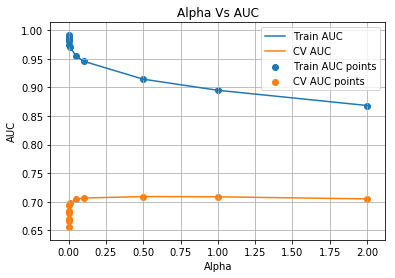

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.463946,0.045050,0.032932,0.002083,1e-05,{'alpha': 1e-05},0.652349,0.661481,0.649401,0.659020,...,0.656011,0.004456,12,0.991337,0.990924,0.991215,0.991141,0.991084,0.991140,0.000138
1,0.525815,0.054606,0.040493,0.010529,5e-05,{'alpha': 5e-05},0.663155,0.670350,0.660517,0.667613,...,0.666165,0.003734,11,0.989174,0.988697,0.989025,0.988897,0.988886,0.988936,0.000158
2,0.567418,0.090767,0.049874,0.009685,0.0001,{'alpha': 0.0001},0.668071,0.674411,0.665448,0.671047,...,0.670708,0.003558,10,0.987978,0.987449,0.987811,0.987655,0.987654,0.987710,0.000177
3,0.589954,0.051714,0.051585,0.011108,0.0005,{'alpha': 0.0005},0.677840,0.682304,0.675635,0.681317,...,0.680298,0.003151,9,0.984235,0.983483,0.984007,0.983766,0.983755,0.983849,0.000254
4,0.563564,0.094512,0.052448,0.010376,0.001,{'alpha': 0.001},0.682645,0.686742,0.680134,0.685148,...,0.684503,0.002798,8,0.982049,0.981206,0.981758,0.981501,0.981525,0.981608,0.000282
5,0.631509,0.048226,0.068285,0.020023,0.005,{'alpha': 0.005},0.692603,0.694369,0.689699,0.693922,...,0.693521,0.002388,7,0.974822,0.973726,0.974506,0.974119,0.974255,0.974286,0.000368
6,0.539854,0.062414,0.055652,0.012794,0.01,{'alpha': 0.01},0.696131,0.697319,0.694562,0.697825,...,0.697377,0.002153,6,0.970464,0.969219,0.970101,0.969655,0.969842,0.969856,0.000418
7,0.513773,0.049658,0.047872,0.014873,0.05,{'alpha': 0.05},0.702789,0.702839,0.702519,0.705303,...,0.704452,0.002401,5,0.955588,0.953971,0.955151,0.954583,0.954888,0.954836,0.000544
8,0.497139,0.036818,0.038730,0.007774,0.1,{'alpha': 0.1},0.705042,0.703618,0.704821,0.707678,...,0.706500,0.002760,3,0.946312,0.944543,0.945905,0.945245,0.945582,0.945518,0.000601
9,0.464633,0.017332,0.040291,0.012258,0.5,{'alpha': 0.5},0.708242,0.704022,0.707484,0.711864,...,0.709189,0.003582,1,0.914970,0.912857,0.914641,0.914007,0.914469,0.914189,0.000735


In [15]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()
results

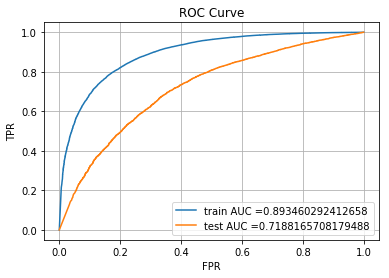

In [16]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.5,class_prior=[0.5,0.5])
nb.fit(X_tr_bow, y_tr)

y_tr_pred = nb.predict_proba(X_tr_bow)[:,1]
y_te_pred = nb.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [17]:
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("best threshold:", t)
    print(50*"=")
    return t

def prediction(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [18]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.7085794552228691
Test Accuracy Score
0.7375743707093821
Test F1 Score
0.832759727002275


# Naive Bayes (with tf-idf Featurizated text features)

# NB Stacking of vectors (with tf-idf Featurized text features)

In [19]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_quantity, x_tr_prev_projects, x_tr_title_word_count)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_quantity, x_te_prev_projects, x_te_title_word_count)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(87398, 206267) (87398,)
(21850, 206267) (21850,)


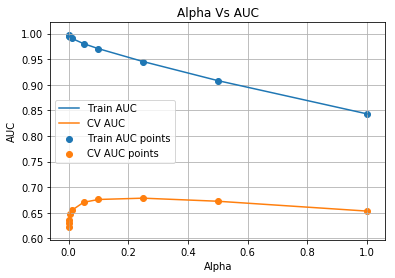

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.536172,0.069980,0.039893,0.009710,0.0001,{'alpha': 0.0001},0.620911,0.624846,0.623810,0.625576,...,0.622430,0.003142,10,0.997037,0.996902,0.996907,0.996973,0.996821,0.996928,0.000073
1,0.507643,0.047926,0.038104,0.007438,0.0005,{'alpha': 0.0005},0.628963,0.632456,0.632810,0.634454,...,0.630848,0.003193,9,0.996241,0.996094,0.996114,0.996152,0.995965,0.996113,0.000090
2,0.545341,0.057134,0.047274,0.016150,0.001,{'alpha': 0.001},0.633328,0.636574,0.637662,0.639155,...,0.635381,0.003227,8,0.995637,0.995480,0.995513,0.995530,0.995320,0.995496,0.000103
3,0.497669,0.012344,0.040498,0.004907,0.005,{'alpha': 0.005},0.645831,0.648114,0.651245,0.652404,...,0.648223,0.003301,7,0.993021,0.992808,0.992919,0.992848,0.992571,0.992833,0.000150
4,0.511869,0.039959,0.044474,0.014078,0.01,{'alpha': 0.01},0.652167,0.653915,0.657956,0.659026,...,0.654695,0.003309,5,0.990973,0.990697,0.990878,0.990746,0.990432,0.990745,0.000184
5,0.487696,0.035748,0.038702,0.007840,0.05,{'alpha': 0.05},0.667660,0.668045,0.673935,0.675510,...,0.670517,0.003475,4,0.980759,0.980151,0.980714,0.980257,0.979889,0.980354,0.000335
6,0.481114,0.038418,0.040099,0.009381,0.1,{'alpha': 0.1},0.673130,0.673082,0.679340,0.681495,...,0.676101,0.003592,2,0.971035,0.970115,0.971053,0.970294,0.969985,0.970496,0.000458
7,0.559704,0.035437,0.047272,0.010605,0.25,{'alpha': 0.25},0.675437,0.674970,0.681576,0.684741,...,0.678639,0.003854,1,0.946059,0.944579,0.946213,0.944789,0.944908,0.945310,0.000685
8,0.511830,0.038401,0.033112,0.008161,0.5,{'alpha': 0.5},0.668963,0.668569,0.675882,0.679390,...,0.672645,0.004269,3,0.909003,0.907178,0.909335,0.907134,0.908135,0.908157,0.000906
9,0.498933,0.037005,0.041200,0.011568,1,{'alpha': 1},0.648782,0.649216,0.657741,0.660691,...,0.653405,0.004872,6,0.844150,0.842353,0.844176,0.841573,0.843894,0.843229,0.001068


In [20]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.25,0.5,1]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()

results

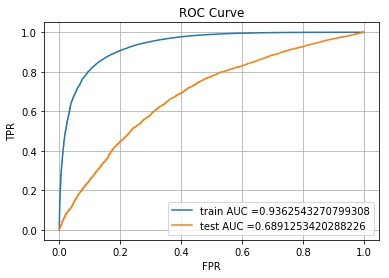

In [21]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.25, class_prior=[0.5,0.5])
nb.fit(X_tr_tfidf, y_tr)

y_tr_pred = nb.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = nb.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [22]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.493008278243337
Test Accuracy Score
0.7555148741418765
Test F1 Score
0.8492748716212404


# Standardization - Price, Quantity, Previous Projects, Word_counts

In [23]:
def stan(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train_stan = scaler.transform(x_train)
    x_test_stan = scaler.transform(x_test)
    return (x_train_stan, x_test_stan)

In [24]:
#Project Price
(x_tr_price_stan, x_te_price_stan) = stan(x_tr['price'].values.reshape(-1,1), x_te['price'].values.reshape(-1,1))

#Resource Quantities
(x_tr_quantity_stan, x_te_quantity_stan) = stan(x_tr['quantity'].values.reshape(-1,1), x_te['quantity'].values.reshape(-1,1))

#Previously posted projects by a teacher
(x_tr_prev_projects_stan, x_te_prev_projects_stan) = stan(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1), x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

#No. of Words in a title
(x_tr_title_word_count_stan, x_te_title_word_count_stan) = stan(x_tr['titles_word_count'].values.reshape(-1,1), x_te['titles_word_count'].values.reshape(-1,1))

#No. of Words in an essay
(x_tr_essay_word_count_stan, x_te_essay_word_count_stan) = stan(x_tr['essays_word_count'].values.reshape(-1,1), x_te['essays_word_count'].values.reshape(-1,1))

# Logistic Regression (with BoW Featurized text features)

# Stacking

In [25]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_price_stan, x_tr_quantity_stan, x_tr_prev_projects_stan, x_tr_essay_word_count_stan, x_tr_title_word_count_stan)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_price_stan, x_te_quantity_stan, x_te_prev_projects_stan, x_te_essay_word_count_stan, x_te_title_word_count_stan)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(87398, 206072) (87398,)
(21850, 206072) (21850,)


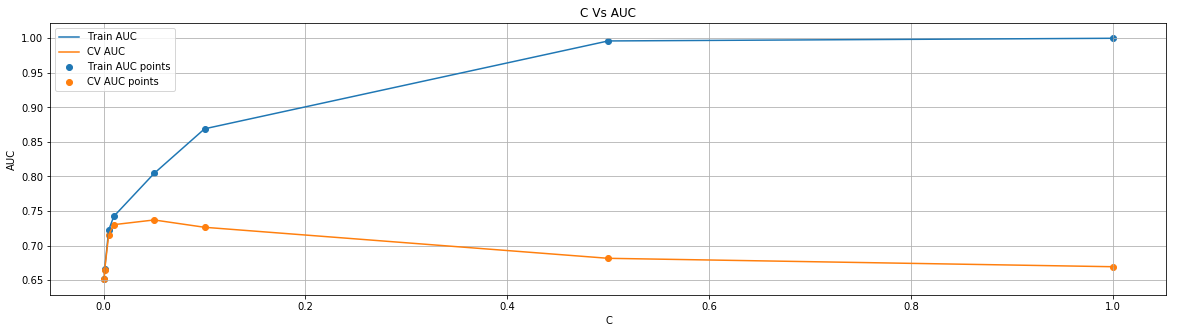

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.716735,0.160170,0.016150,0.002308,0.0005,{'C': 0.0005},0.653267,0.655404,0.649215,0.647705,...,0.651072,0.002831,8,0.652564,0.649265,0.653162,0.652455,0.651671,0.651823,0.001364
1,2.547011,0.228467,0.018745,0.002780,0.001,{'C': 0.001},0.666128,0.669050,0.663475,0.663247,...,0.664978,0.002328,7,0.665953,0.666055,0.664898,0.666933,0.667117,0.666191,0.000795
2,3.187305,0.088888,0.017765,0.000751,0.005,{'C': 0.005},0.714033,0.718475,0.716310,0.718310,...,0.715888,0.002407,4,0.723805,0.722902,0.721945,0.721240,0.723307,0.722640,0.000929
3,3.614951,0.074993,0.018757,0.001728,0.01,{'C': 0.01},0.727785,0.730533,0.730704,0.735294,...,0.730313,0.002856,2,0.743036,0.742151,0.742194,0.740876,0.742889,0.742229,0.000765
4,5.885744,0.250656,0.018170,0.000962,0.05,{'C': 0.05},0.734627,0.737179,0.735735,0.739937,...,0.737109,0.001842,1,0.805453,0.804195,0.805084,0.804332,0.803121,0.804437,0.000806
5,8.839044,0.816019,0.023665,0.008583,0.1,{'C': 0.1},0.722153,0.727850,0.722811,0.728691,...,0.726526,0.003479,3,0.869283,0.867672,0.871162,0.868935,0.867694,0.868949,0.001282
6,78.989008,29.709557,0.018361,0.000495,0.5,{'C': 0.5},0.676629,0.683421,0.674200,0.684474,...,0.681651,0.005549,5,0.996061,0.996017,0.996020,0.995916,0.996050,0.996013,0.000051
7,50.614732,13.286792,0.015672,0.000613,1,{'C': 1},0.664309,0.672649,0.662563,0.670990,...,0.669486,0.005334,6,0.999885,0.999823,0.999891,0.999881,0.999854,0.999867,0.000025


In [26]:
lr = LogisticRegression(penalty='l1', class_weight='balanced')
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results

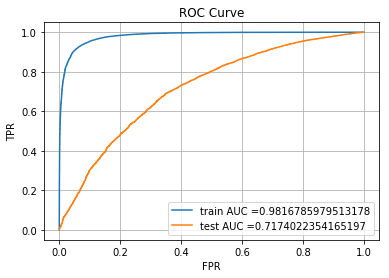

In [27]:
lr = LogisticRegression(C=0.05)
lr.fit(X_tr_bow, y_tr)

y_tr_pred = lr.predict_proba(X_tr_bow)[:,1]
y_te_pred = lr.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [28]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.7683793005917349
Test Accuracy Score
0.7764759725400457
Test F1 Score
0.8635220477281619


# Logistic Regression (with tf-idf Featurized text features)

# Stacking

In [29]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_price_stan, x_tr_quantity_stan, x_tr_prev_projects_stan, x_tr_essay_word_count_stan, x_tr_title_word_count_stan)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_price_stan, x_te_quantity_stan, x_te_prev_projects_stan, x_te_essay_word_count_stan, x_te_title_word_count_stan)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(87398, 206072) (87398,)
(21850, 206072) (21850,)


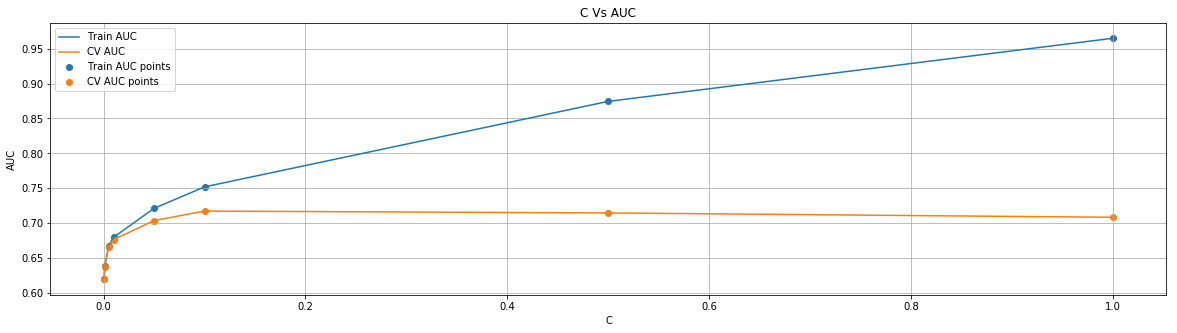

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.295342,0.138891,0.014155,0.001159,0.0005,{'C': 0.0005},0.619960,0.623185,0.621700,0.619750,...,0.619459,0.003603,8,0.620238,0.616952,0.619810,0.622909,0.619796,0.619941,0.001891
1,1.253640,0.116703,0.013691,0.001043,0.001,{'C': 0.001},0.637985,0.641564,0.639400,0.636554,...,0.637666,0.002932,7,0.636601,0.638237,0.636952,0.640650,0.638483,0.638185,0.001428
2,1.889604,0.136493,0.014362,0.002329,0.005,{'C': 0.005},0.668670,0.668140,0.671381,0.662158,...,0.666164,0.004144,6,0.667566,0.666726,0.666751,0.668538,0.668849,0.667686,0.000882
3,3.149071,0.525068,0.018424,0.004933,0.01,{'C': 0.01},0.677985,0.678413,0.681266,0.674514,...,0.676568,0.003649,5,0.680650,0.679430,0.678635,0.680168,0.681579,0.680092,0.001009
4,4.316268,0.259466,0.015759,0.000747,0.05,{'C': 0.05},0.700603,0.705366,0.708743,0.706332,...,0.703802,0.003939,4,0.722997,0.721335,0.720468,0.719277,0.722531,0.721321,0.001355


In [30]:
lr = LogisticRegression(penalty='l1', class_weight='balanced')
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results.head()

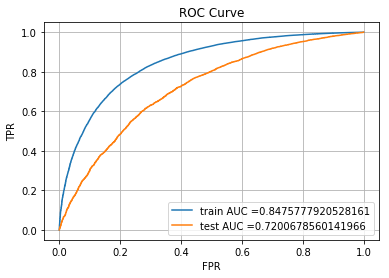

In [31]:
lr = LogisticRegression(C=0.1)
lr.fit(X_tr_tfidf, y_tr)

y_tr_pred = lr.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = lr.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [33]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.827052614319918
Test Accuracy Score
0.7124942791762013
Test F1 Score
0.8125335720680393
